学习数据分析已经有几个月了，今天就来验收一下学习成果吧。本次项目主要是为了复习并巩固python数据分析的相关知识（数据清洗和数据可视化），主要用到了pandas，matplotlib，seaborn这几个包。

项目环境：python3.6

### 一、提出问题

1.数据分析师的总体薪资水平

2.数据分析师的城市分布情况

3不同城市的薪资分布情况

4.数据分析师工作经验对薪资的影响

5.数据分析师学历对薪资的影响

6.哪些公司招聘数据分析师的需求量最大

7.数据分析师中哪些岗位标签最多

### 二、数据预处理

#### 导入数据

In [1]:
import warnings
warnings.filterwarnings('ignore')  #忽略警告
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid',{'font.sans-serif':'simhei'}) #显示中文字体
%matplotlib inline

In [2]:
data = pd.read_csv('DataAnalyst.csv',encoding='gb2312')

#查看数据整体情况
data.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [3]:
#查看字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


改数据集一共有6876条记录，其中companyLabelList，businessZones，firstType，secondType，positionLables都存在缺失值的情况。

#### 去重

In [4]:
#查看是否有重复数据
data.duplicated().sum()

1840

In [5]:
#有1840条重复数据，删除重复数据
data_clean = data.drop_duplicates()

#### 数据清洗

本次数据清洗主要分两部分：薪水（salary）和职位标签（positionLables）。positionLables有缺失值，后面再进行处理。

In [6]:
#定义一个函数，获取薪资下限
def bottom(df):
    n = df.lower().find('k')
    bottomSalary = int(df[:n])
    return bottomSalary

data_clean['bottomSalary'] = data_clean.salary.map(bottom)

In [7]:
#同样的，定义函数获取薪资上限，因为salary这块数据包含“以上”这样的字段，所以通过if函数进行条件判断
#如果存在“以上”，则默认薪资上限等于薪资下限

def top(df):
    n = df.find('-')
    if n != -1:
        length = len(df)
        topSalary = df[n+1:length-1]
        return int(topSalary)
    else:
        k = df.lower().find('k')
        topSalary = int(df[:k])
        return topSalary

data_clean['topSalary'] = data_clean.salary.map(top)

In [8]:
#取平均工资
data_clean['avgSalary'] = (data_clean['bottomSalary'] + data_clean['topSalary'])/2

#### 选择子集

In [9]:
columns = ['city','companyShortName','education','positionName','positionLables','workYear','avgSalary']
data_new = data_clean[columns]
data_new[:5]

,city,companyShortName,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0
3,上海,数云,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0
4,上海,银基富力,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5


### 三、数据可视化

#### 总体薪资水平

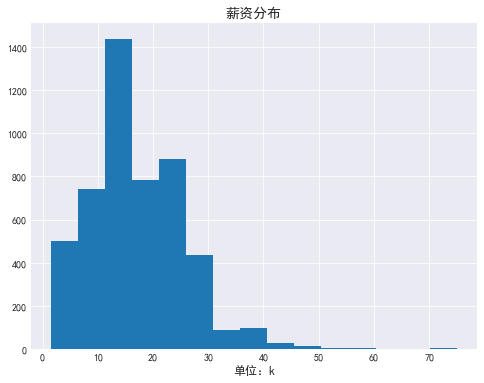

In [10]:
data_new.avgSalary.hist(bins=15,figsize=(8,6))
plt.title('薪资分布',fontsize=14)
plt.xlabel('单位：k',fontsize=12)
plt.show()

数据分析师的薪资大多数集中在5K-20K之间，只有少部分的人可以拿到高薪。薪资的整体水平相当可观。

#### 各城市岗位需求量

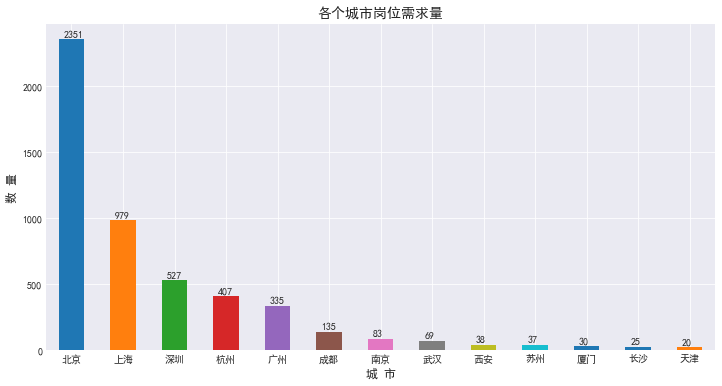

In [11]:
city_amount = data_new.groupby('city').avgSalary.count().sort_values(ascending=False)

city_amount.plot.bar(figsize=(12,6),rot=0)
for i,v in enumerate(city_amount):
    plt.text(i-0.15,v+20,v)
plt.title('各个城市岗位需求量',fontsize=14)
plt.xlabel('城 市',fontsize=12)
plt.ylabel('数 量',fontsize=12)
plt.show()

数据分析师岗位需求量排在前5的城市分别是：北京、上海、深圳、杭州、广州。其中，北京位居榜首，几乎占了半壁江山。

#### 各个城市平均薪资

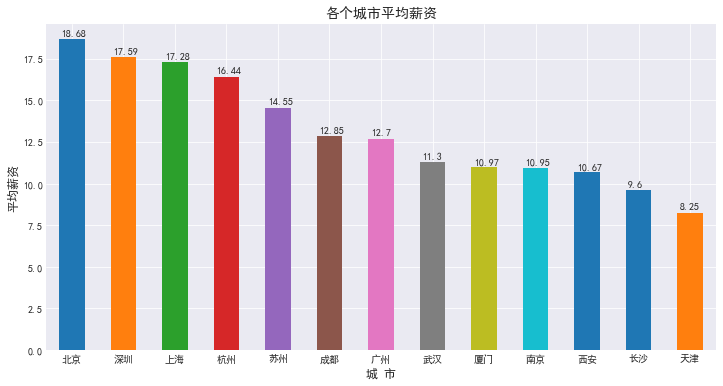

In [12]:
city_mean = data_new.groupby('city').avgSalary.mean().sort_values(ascending=False)

city_mean.plot.bar(figsize=(12,6),rot=0)
for i,v in enumerate(city_mean):
    plt.text(i-0.2,v+0.2,round(v,2))
plt.title('各个城市平均薪资',fontsize=14)
plt.xlabel('城 市',fontsize=12)
plt.ylabel('平均薪资',fontsize=12)
plt.show()

平均薪资由高到低依次为北京，深圳，上海，杭州。

#### 不同城市的薪资分布情况

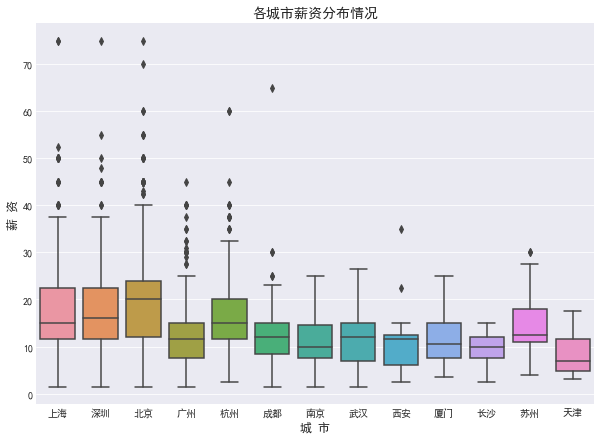

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='city',y='avgSalary',data=data_new)
plt.title('各城市薪资分布情况',fontsize=14)
plt.xlabel('城 市',fontsize=12)
plt.ylabel('薪 资',fontsize=12)
plt.show()

可以看到，北京的数据分析师薪资高于其他城市，尤其是中位数。其次是上海、深圳、杭州。所以，这些城市还是很适合数据分析师发展的。

#### 对数据进行面元划分pd.cut

In [14]:
#为了便于分析，连续数据常常被离散化或拆分为“面元”（bin）
bins = [0,5,10,15,20,30,100]
labels = ['0-5','5-10','10-15','15-20','20-30','30+']
data_new['level']=pd.cut(data_new.avgSalary,bins=bins,labels=labels)

In [15]:
pivot_city_level = data_new.pivot_table('avgSalary','city','level',aggfunc='count')
pivot_prop = pivot_city_level.apply(lambda x:x/x.sum(),axis=1)
pivot_prop

level,0-5,5-10,10-15,15-20,20-30,30+
city,,,,,,
上海,0.312564,0.073544,0.121553,0.209397,0.229826,0.053115
北京,0.225861,0.069332,0.124628,0.176946,0.340706,0.062527
南京,0.301205,0.144578,0.361446,0.132530,0.060241,NaN
厦门,0.433333,0.200000,0.300000,NaN,0.066667,NaN
天津,0.200000,0.350000,0.350000,0.100000,NaN,NaN
广州,0.382090,0.149254,0.247761,0.101493,0.086567,0.032836
成都,0.466667,0.096296,0.222222,0.118519,0.088889,0.007407
杭州,0.388206,0.049140,0.149877,0.169533,0.199017,0.044226
武汉,0.449275,0.188406,0.231884,0.072464,0.057971,NaN


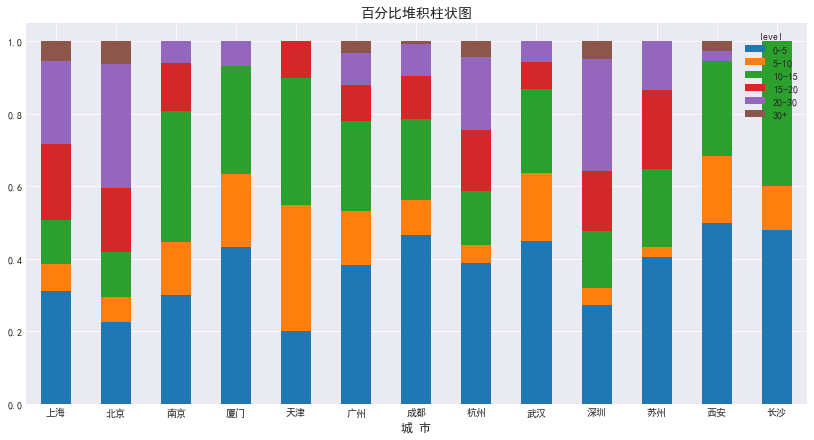

In [16]:
pivot_prop.plot.bar(stacked=True,figsize=(14,7),rot=0)
plt.title('百分比堆积柱状图',fontsize=14)
plt.xlabel('城 市',fontsize=12)
plt.show()

对数据进行面元划分之后，可以更加直观的看到各个城市不同等级的薪资占比情况。

#### 工作经验对薪资的影响

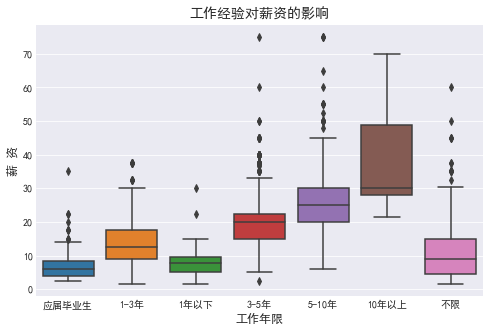

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='workYear',y='avgSalary',data=data_new)
plt.title('工作经验对薪资的影响',fontsize=14)
plt.xlabel('工作年限',fontsize=12)
plt.ylabel('薪 资',fontsize=12)
plt.show()

从工作年限看，工作年限越长，薪资越高。毕业生和工作多年的不在一个梯度。由此可以看出，数据分析师的前途是很光明的。

#### 学历对薪资的影响

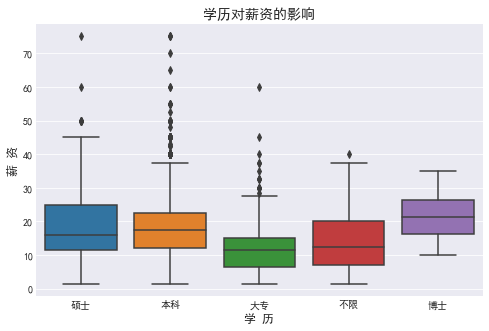

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='education',y='avgSalary',data=data_new)
plt.title('学历对薪资的影响',fontsize=14)
plt.xlabel('学 历',fontsize=12)
plt.ylabel('薪 资',fontsize=12)
plt.show()

从学历看，博士的薪资遥遥领先,大专学历稍有弱势。

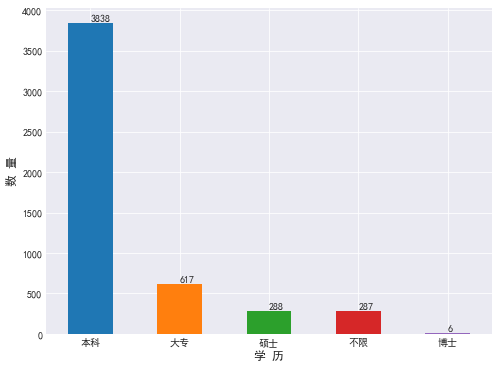

In [19]:
data_edu = data_new.education.value_counts()
data_edu.plot.bar(rot=0,figsize=(8,6))
for i,v in enumerate(data_edu):
    plt.text(i,v+20,v)
plt.xlabel('学 历',fontsize=12)
plt.ylabel('数 量',fontsize=12)
plt.show()

企业对本科生的需求量最大，而博士生却是凤毛麟角。这应该跟市场供求有一定的关系，本科生源源不断的从学校毕业出来，数量庞大，供大于求；而博士生相对来说还是比较少的，不容易招到。

#### 北京和上海两个城市的不同学历薪资的对比情况

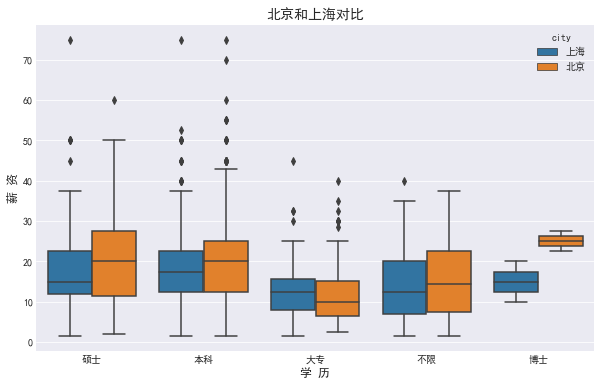

In [20]:
data_bs = data_new[data_new.city.isin(['北京','上海'])]

plt.figure(figsize=(10,6))
sns.boxplot(x='education',y='avgSalary',hue='city',data=data_bs)
plt.title('北京和上海对比',fontsize=14)
plt.xlabel('学 历',fontsize=12)
plt.ylabel('薪 资',fontsize=12)
plt.show()

可以看到，不同学历背景下，北京的薪资都是高于上海的。

C:\install\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\install\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


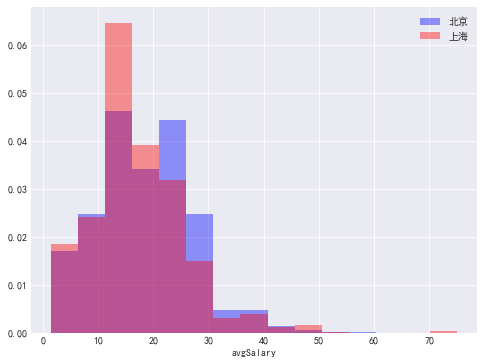

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(data_new.avgSalary[data_new.city == '北京'],kde=False,bins=15,norm_hist=True,color='blue',label='北京')
sns.distplot(data_new.avgSalary[data_new.city == '上海'],kde=False,bins=15,norm_hist=True,color='red',label='上海')
plt.legend()
plt.show()

利用堆积柱状图可以更清晰的看到北京和上海不同等级的薪资对比情况。总体来看，北京的待遇要优于上海。

#### 各城市不同学历的平均薪资对比

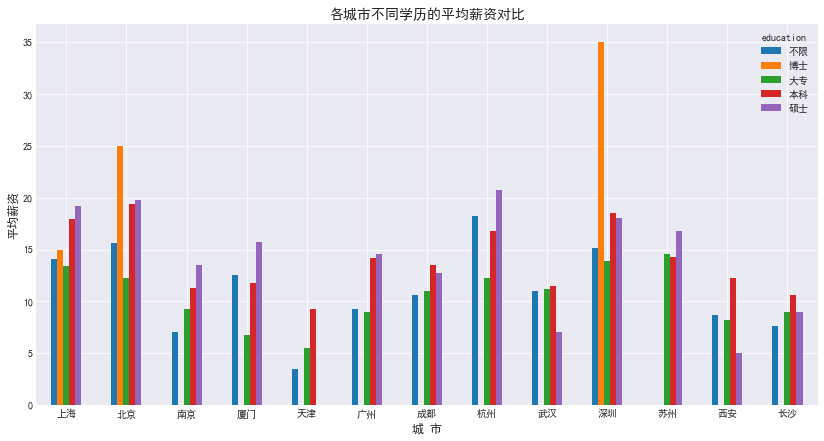

education,不限,博士,大专,本科,硕士
city,,,,,
上海,14.051471,15.0,13.395455,17.987552,19.180000
北京,15.673387,25.0,12.298429,19.431383,19.759740
南京,7.000000,NaN,9.272727,11.327869,13.500000
厦门,12.500000,NaN,6.785714,11.805556,15.750000
天津,3.500000,NaN,5.500000,9.300000,NaN
广州,9.250000,NaN,8.988095,14.170259,14.571429
成都,10.562500,NaN,11.000000,13.520202,12.750000
杭州,18.269231,NaN,12.262712,16.823432,20.710526
武汉,10.950000,NaN,11.214286,11.500000,7.000000


In [22]:
city_edu_pivot = data_new.pivot_table('avgSalary','city','education')
city_edu_pivot.plot.bar(figsize=(14,7),rot=0)
plt.title('各城市不同学历的平均薪资对比',fontsize=14)
plt.xlabel('城 市',fontsize=12)
plt.ylabel('平均薪资',fontsize=12)
plt.show()
city_edu_pivot

#### 各个公司招聘数据分析师的需求量

In [23]:
company_count=data_new.groupby('companyShortName').avgSalary.count().sort_values()
company_count[-15:]

companyShortName
去哪儿网            22
Gridsum 国双      23
搜狐媒体            23
饿了么             23
宜信              27
TalkingData     28
个推              31
百度外卖            31
京东              32
今日头条            32
腾讯              32
网易              36
百度              44
滴滴出行            64
美团点评           175
Name: avgSalary, dtype: int64

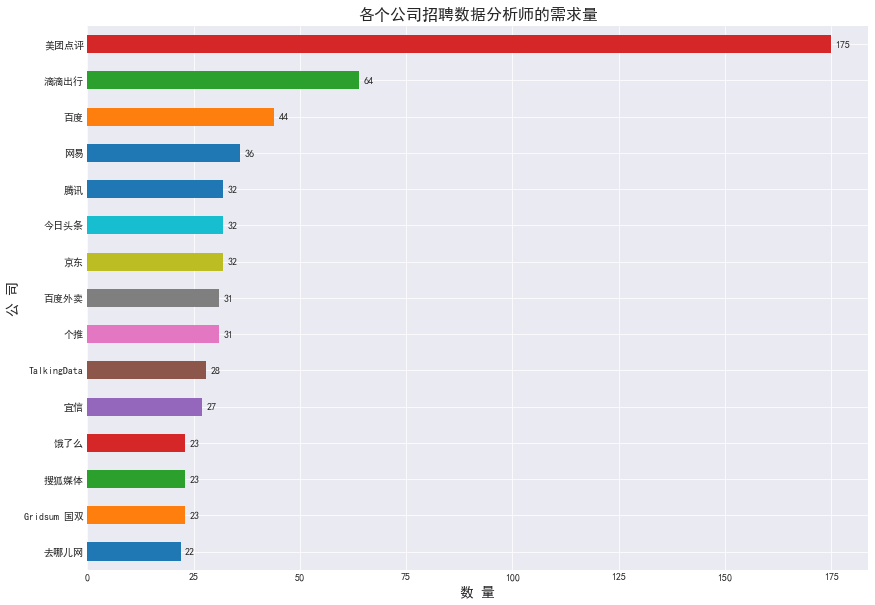

In [24]:
company_count[-15:].plot.barh(figsize=(14,10))
for i,v in enumerate(company_count[-15:]):
    plt.text(v+1,i-0.1,v)
plt.title('各个公司招聘数据分析师的需求量',fontsize=16)
plt.xlabel('数 量',fontsize=14)
plt.ylabel('公 司',fontsize=14)
plt.show()

上图列出了各公司招聘数据分析师需求量前15名的公司，美团的需求量最大。

#### 不同的城市，招聘数据分析师需求前5的公司

In [25]:
def topn(data,n=5):
    return data.value_counts()[:n]

data_new.groupby('city').companyShortName.apply(topn)

city                 
上海    饿了么                 23
      美团点评                19
      返利网                 15
      买单侠                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      亚信                   3
厦门    美图公司                 4
      Datartisan 数据工匠      2
      厦门融通信息技术有限责任公司       2
      笨鸟社交                 1
      科莫宝                  1
天津    神州商龙                 2
      瑞达恒RCC               1
      丰赢未来                 1
      中国婚博会                1
      众嘉禾励                 1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      PPmoney互联网金融平台       6
                        ... 
杭州    个推                  22
      有数金服                15
      网易             

#### 生成词云图

In [26]:
#对positionLables进行数据清洗
#把字符串转化为列表
def label(df):
    return df[1:-1].replace(' ','').replace("'",'').split(',')

labels = data_clean.positionLables.dropna().apply(label)

In [27]:
word = []
for i in labels:
    word.extend(i)
    
df_word = pd.value_counts(word)

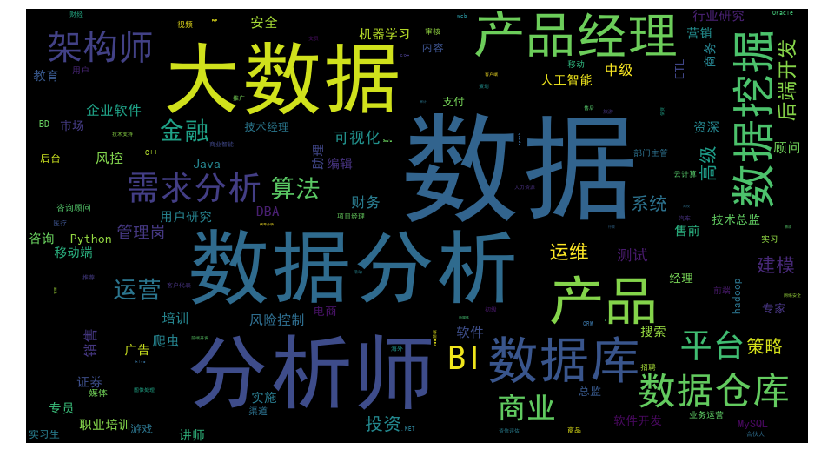

In [28]:
from wordcloud import WordCloud

#font_path 定义字体路径，以显示中文字体
wordcloud = WordCloud(font_path='D:/ttf/SimHei.ttf',width=900,height=500)
wordcloud.fit_words(df_word) #根据词频生成词云
plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

可以看到像大数据，数据分析，分析师这样的岗位标签是最多的，大数据是未来的趋势。

#### 本次分析还有很多不足，自己作为一只菜鸟，可能分析出来的结果没太多价值，但是通过这次项目分析，我从中学到了很多东西，这次分析也算是我的一个学习记录吧。